In [1]:
import os , csv ,multiprocessing , configparser
from tools.import_data import *
from pathlib import Path, PureWindowsPath
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [2]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import feature_selection as fs
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer # for NaN values
import pandas
import matplotlib.pyplot as plt

In [3]:
#Selecting Models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [4]:
def train_the_data(X_train,Y_train,models):
    # Spot Check Algorithms with cross validation
    # evaluate each model in turn
    scoring = 'accuracy'
    scores = []
    names = []
    results = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        scores.append(cv_results)
        names.append(name)
        results.append({"name":name,"score":cv_results.mean()})
        # msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        # print(msg)
    # Compare Algorithms
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(scores)
    ax.set_xticklabels(names)
    plt.show()
    return results
        
def test_the_data(X_train,Y_train,X_test,Y_test,models):
    # Make predictions on test dataset
    results = []
    for name, model in models:
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        # print('Model ' , name)
        # print('Accuracy: ', accuracy_score(Y_test, predictions))
        results.append({"name":name,"score":accuracy_score(Y_test, predictions)})
        #print(confusion_matrix(Y_validation, predictions))
        # print(classification_report(Y_test, predictions))
    return results 
    # 
    # encoder(predict_dataset)
    # #print (predict_dataset)
    # predict=predict_dataset.values[:,0:22]
    # 
    # predictions = lr.predict(predict)
    
    # temp = pandas.DataFrame(predict)
    # temp['class'] = predictions
    # temp.to_csv('predict.csv')
def get_the_best(results): # input - list of dict {"name":name,"score":score}
    m = max([k["score"] for k in results])
    i = [k["score"] for k in results].index(m)
    name = results[i]["name"]
    printmd('The best model for the given data is: <span style="color:green">' + str(name).format() + '</span> with the score <span style="color:green">' + str(m) + '</span>' )
    # print ('The best model for the given train (' + X_train.shape +') is: ' + name + 'with the score ' +m )
    return results[i] # the max model (dict type)

In [5]:
#consts
FILE_PATH = os.path.dirname(os.path.abspath("__file__"))
CONFIG_FILE = '{}/config.ini'.format(FILE_PATH)
config = configparser.ConfigParser()
config.read(CONFIG_FILE)
TRAIN_FILE = str(config['files']['train_set'])
TEST_FILE = str(config['files']['test_set'])
if __name__ == "__main__":
    X_train, Y_train ,names_train = load_dataset(TRAIN_FILE)    
    print ('Train data shape: ', X_train.shape)
    print ('Train labels shape: ', Y_train.shape)
    if TEST_FILE:
        X_test, Y_test ,names_test = load_dataset(TEST_FILE)
        print ('Test data shape: ', X_test.shape)
        print ('Test labels shape: ', Y_test.shape)

Train data shape:  (776, 51)
Train labels shape:  (776,)


In [6]:
    # Create our imputer to replace missing values with the mean e.g.
    imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
    imp = imp.fit(X_train)
    X_train_imp = imp.transform(X_train)

In [52]:
    #before we found the elbow
    new_trains = []
    new_shapes_ratio = []
    new_range = []
    range = np.arange(0, 1, 0.01)
    for VTHRESH in reversed(range):  
        sel = fs.VarianceThreshold(VTHRESH)
        X_train_mod = sel.fit_transform(X_train_imp)
        if len(new_shapes_ratio) >= 1:
            if new_shapes_ratio[-1]!= X_train_mod.shape[-1]/X_train.shape[-1]:
                new_range.append(VTHRESH)
                new_trains.append(X_train_mod)
                new_shapes_ratio.append(X_train_mod.shape[-1]/X_train.shape[-1])
        else:
            new_range.append(VTHRESH)
            new_trains.append(X_train_mod)
            new_shapes_ratio.append(X_train_mod.shape[-1]/X_train.shape[-1])
        


**Training Section** for: 19 features

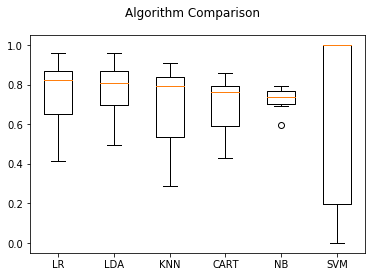

The best model for the given data is: <span style="color:green">LDA</span> with the score <span style="color:green">0.7660839160839161</span>

{'name': 'LR', 'score': 0.7478188478188479}
{'name': 'LDA', 'score': 0.7660839160839161}
{'name': 'KNN', 'score': 0.6947552447552447}
{'name': 'CART', 'score': 0.6925407925407926}
{'name': 'NB', 'score': 0.7279220779220779}
{'name': 'SVM', 'score': 0.6779220779220779}


**Training Section** for: 20 features

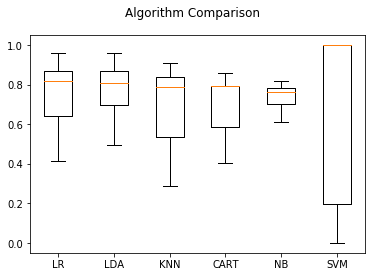

The best model for the given data is: <span style="color:green">LDA</span> with the score <span style="color:green">0.7660839160839161</span>

{'name': 'LR', 'score': 0.7452380952380953}
{'name': 'LDA', 'score': 0.7660839160839161}
{'name': 'KNN', 'score': 0.6934731934731935}
{'name': 'CART', 'score': 0.7001831501831501}
{'name': 'NB', 'score': 0.7395104895104894}
{'name': 'SVM', 'score': 0.6779220779220779}


**Training Section** for: 21 features

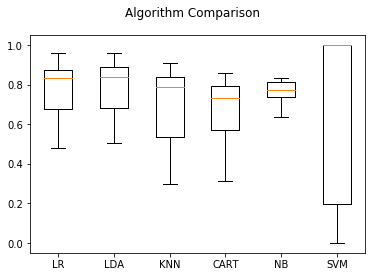

The best model for the given data is: <span style="color:green">LDA</span> with the score <span style="color:green">0.7841325341325341</span>

{'name': 'LR', 'score': 0.7711788211788212}
{'name': 'LDA', 'score': 0.7841325341325341}
{'name': 'KNN', 'score': 0.6947718947718948}
{'name': 'CART', 'score': 0.6821678321678322}
{'name': 'NB', 'score': 0.7600566100566102}
{'name': 'SVM', 'score': 0.6779220779220779}


**Training Section** for: 22 features

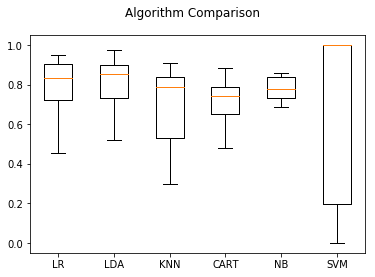

The best model for the given data is: <span style="color:green">LDA</span> with the score <span style="color:green">0.8034798534798535</span>

{'name': 'LR', 'score': 0.7879953379953379}
{'name': 'LDA', 'score': 0.8034798534798535}
{'name': 'KNN', 'score': 0.6934731934731935}
{'name': 'CART', 'score': 0.7185980685980685}
{'name': 'NB', 'score': 0.7808025308025308}
{'name': 'SVM', 'score': 0.6779220779220779}


**Training Section** for: 23 features

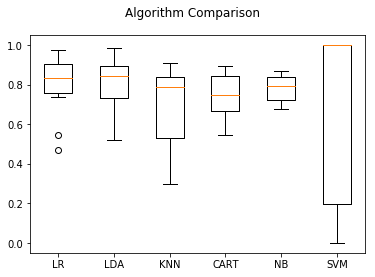

The best model for the given data is: <span style="color:green">LDA</span> with the score <span style="color:green">0.7983016983016984</span>

{'name': 'LR', 'score': 0.7931734931734931}
{'name': 'LDA', 'score': 0.7983016983016984}
{'name': 'KNN', 'score': 0.6934731934731935}
{'name': 'CART', 'score': 0.7430735930735931}
{'name': 'NB', 'score': 0.7808025308025308}
{'name': 'SVM', 'score': 0.6779220779220779}


**Training Section** for: 24 features

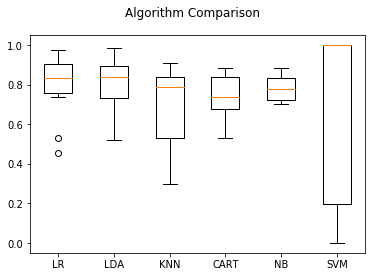

The best model for the given data is: <span style="color:green">LDA</span> with the score <span style="color:green">0.7957375957375958</span>

{'name': 'LR', 'score': 0.7905760905760906}
{'name': 'LDA', 'score': 0.7957375957375958}
{'name': 'KNN', 'score': 0.6947718947718948}
{'name': 'CART', 'score': 0.737928737928738}
{'name': 'NB', 'score': 0.7820845820845822}
{'name': 'SVM', 'score': 0.6779220779220779}


**Training Section** for: 26 features

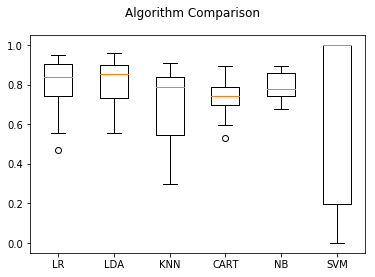

The best model for the given data is: <span style="color:green">LDA</span> with the score <span style="color:green">0.8035131535131536</span>

{'name': 'LR', 'score': 0.7905927405927404}
{'name': 'LDA', 'score': 0.8035131535131536}
{'name': 'KNN', 'score': 0.6973692973692974}
{'name': 'CART', 'score': 0.7366966366966368}
{'name': 'NB', 'score': 0.7897269397269396}
{'name': 'SVM', 'score': 0.6779220779220779}


**Training Section** for: 27 features

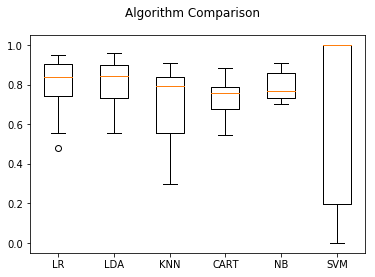

The best model for the given data is: <span style="color:green">LDA</span> with the score <span style="color:green">0.8022311022311023</span>

{'name': 'LR', 'score': 0.7918914418914418}
{'name': 'LDA', 'score': 0.8022311022311023}
{'name': 'KNN', 'score': 0.6986513486513487}
{'name': 'CART', 'score': 0.7353646353646353}
{'name': 'NB', 'score': 0.791008991008991}
{'name': 'SVM', 'score': 0.6779220779220779}


**Training Section** for: 28 features

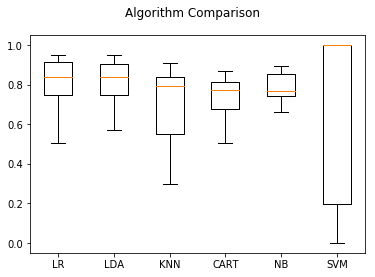

The best model for the given data is: <span style="color:green">LDA</span> with the score <span style="color:green">0.8022977022977023</span>

{'name': 'LR', 'score': 0.7957875457875457}
{'name': 'LDA', 'score': 0.8022977022977023}
{'name': 'KNN', 'score': 0.6986513486513487}
{'name': 'CART', 'score': 0.7328338328338329}
{'name': 'NB', 'score': 0.7858141858141858}
{'name': 'SVM', 'score': 0.6779220779220779}


**Training Section** for: 29 features

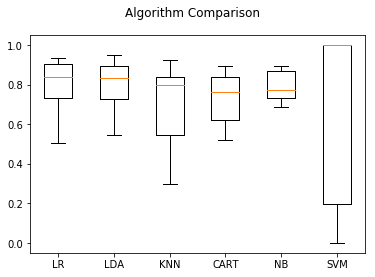

The best model for the given data is: <span style="color:green">LDA</span> with the score <span style="color:green">0.7932400932400931</span>

{'name': 'LR', 'score': 0.7906260406260406}
{'name': 'LDA', 'score': 0.7932400932400931}
{'name': 'KNN', 'score': 0.6986180486180487}
{'name': 'CART', 'score': 0.7378454878454879}
{'name': 'NB', 'score': 0.791008991008991}
{'name': 'SVM', 'score': 0.6779220779220779}


**Training Section** for: 30 features

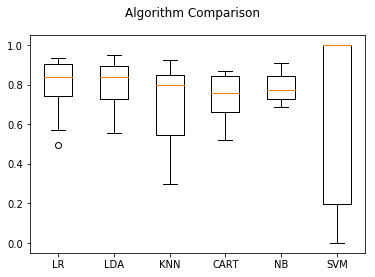

The best model for the given data is: <span style="color:green">LDA</span> with the score <span style="color:green">0.7958374958374959</span>

{'name': 'LR', 'score': 0.7919247419247418}
{'name': 'LDA', 'score': 0.7958374958374959}
{'name': 'KNN', 'score': 0.7011988011988012}
{'name': 'CART', 'score': 0.7392107892107892}
{'name': 'NB', 'score': 0.7897435897435898}
{'name': 'SVM', 'score': 0.6779220779220779}


**Training Section** for: 31 features

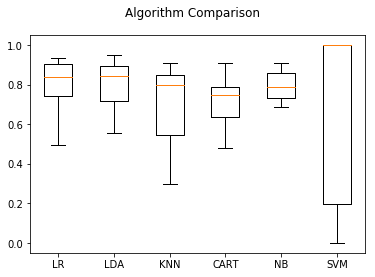

The best model for the given data is: <span style="color:green">LDA</span> with the score <span style="color:green">0.7971028971028971</span>

{'name': 'LR', 'score': 0.7932067932067931}
{'name': 'LDA', 'score': 0.7971028971028971}
{'name': 'KNN', 'score': 0.7012154512154513}
{'name': 'CART', 'score': 0.7173326673326673}
{'name': 'NB', 'score': 0.7948551448551449}
{'name': 'SVM', 'score': 0.6779220779220779}


**Training Section** for: 32 features

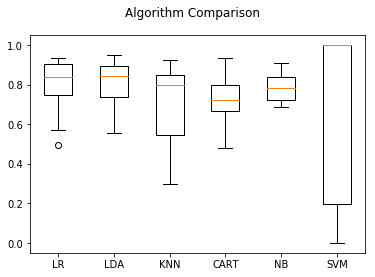

The best model for the given data is: <span style="color:green">LDA</span> with the score <span style="color:green">0.7984182484182484</span>

{'name': 'LR', 'score': 0.7945054945054945}
{'name': 'LDA', 'score': 0.7984182484182484}
{'name': 'KNN', 'score': 0.7037795537795538}
{'name': 'CART', 'score': 0.7185814185814186}
{'name': 'NB', 'score': 0.7871295371295371}
{'name': 'SVM', 'score': 0.6779220779220779}


**Training Section** for: 33 features

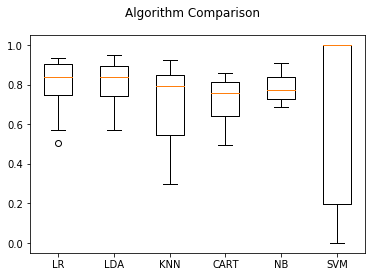

The best model for the given data is: <span style="color:green">LDA</span> with the score <span style="color:green">0.7984348984348985</span>

{'name': 'LR', 'score': 0.7958041958041957}
{'name': 'LDA', 'score': 0.7984348984348985}
{'name': 'KNN', 'score': 0.6999167499167499}
{'name': 'CART', 'score': 0.7172494172494173}
{'name': 'NB', 'score': 0.7871461871461871}
{'name': 'SVM', 'score': 0.6779220779220779}


**Training Section** for: 34 features

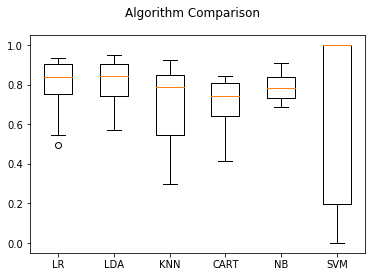

The best model for the given data is: <span style="color:green">LDA</span> with the score <span style="color:green">0.8022810522810522</span>

{'name': 'LR', 'score': 0.7919080919080919}
{'name': 'LDA', 'score': 0.8022810522810522}
{'name': 'KNN', 'score': 0.6973526473526473}
{'name': 'CART', 'score': 0.6939227439227438}
{'name': 'NB', 'score': 0.7923243423243422}
{'name': 'SVM', 'score': 0.6779220779220779}


**Training Section** for: 35 features

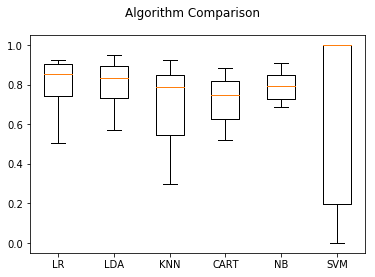

The best model for the given data is: <span style="color:green">LDA</span> with the score <span style="color:green">0.7971861471861471</span>

{'name': 'LR', 'score': 0.7932067932067931}
{'name': 'LDA', 'score': 0.7971861471861471}
{'name': 'KNN', 'score': 0.6973526473526473}
{'name': 'CART', 'score': 0.7210789210789211}
{'name': 'NB', 'score': 0.7923076923076923}
{'name': 'SVM', 'score': 0.6779220779220779}


**Training Section** for: 36 features

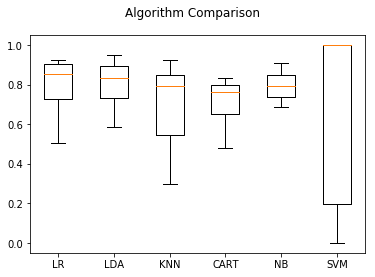

The best model for the given data is: <span style="color:green">LDA</span> with the score <span style="color:green">0.7984848484848485</span>

{'name': 'LR', 'score': 0.7893273393273395}
{'name': 'LDA', 'score': 0.7984848484848485}
{'name': 'KNN', 'score': 0.6986346986346986}
{'name': 'CART', 'score': 0.7107392607392609}
{'name': 'NB', 'score': 0.7948717948717948}
{'name': 'SVM', 'score': 0.6779220779220779}


**Training Section** for: 37 features

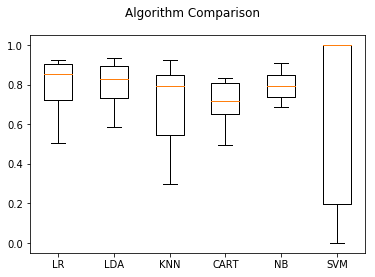

The best model for the given data is: <span style="color:green">LDA</span> with the score <span style="color:green">0.7946220446220446</span>

{'name': 'LR', 'score': 0.7880452880452882}
{'name': 'LDA', 'score': 0.7946220446220446}
{'name': 'KNN', 'score': 0.6986346986346986}
{'name': 'CART', 'score': 0.7044289044289045}
{'name': 'NB', 'score': 0.7935897435897435}
{'name': 'SVM', 'score': 0.6779220779220779}


**Training Section** for: 38 features

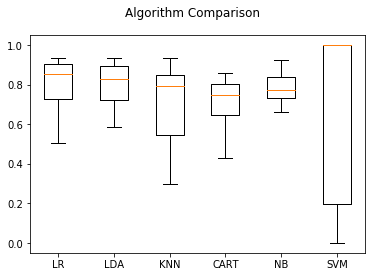

The best model for the given data is: <span style="color:green">LDA</span> with the score <span style="color:green">0.7933233433233433</span>

{'name': 'LR', 'score': 0.7906093906093907}
{'name': 'LDA', 'score': 0.7933233433233433}
{'name': 'KNN', 'score': 0.6999167499167499}
{'name': 'CART', 'score': 0.7004329004329004}
{'name': 'NB', 'score': 0.7870962370962371}
{'name': 'SVM', 'score': 0.6779220779220779}


**Training Section** for: 39 features

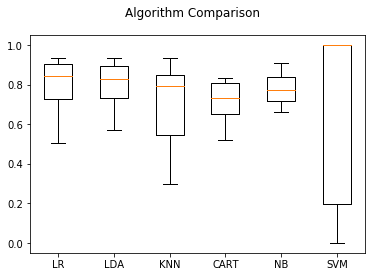

The best model for the given data is: <span style="color:green">LDA</span> with the score <span style="color:green">0.7933233433233433</span>

{'name': 'LR', 'score': 0.7893273393273395}
{'name': 'LDA', 'score': 0.7933233433233433}
{'name': 'KNN', 'score': 0.6999167499167499}
{'name': 'CART', 'score': 0.7082584082584082}
{'name': 'NB', 'score': 0.7832667332667332}
{'name': 'SVM', 'score': 0.6779220779220779}


**Training Section** for: 40 features

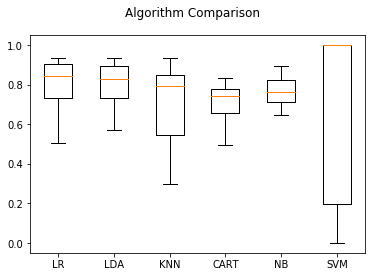

The best model for the given data is: <span style="color:green">LDA</span> with the score <span style="color:green">0.792041292041292</span>

{'name': 'LR', 'score': 0.7906093906093907}
{'name': 'LDA', 'score': 0.792041292041292}
{'name': 'KNN', 'score': 0.6999167499167499}
{'name': 'CART', 'score': 0.7108225108225109}
{'name': 'NB', 'score': 0.7729603729603729}
{'name': 'SVM', 'score': 0.6779220779220779}


**Training Section** for: 41 features

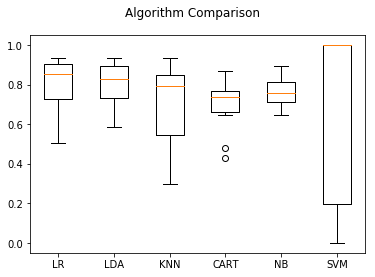

The best model for the given data is: <span style="color:green">LDA</span> with the score <span style="color:green">0.792041292041292</span>

{'name': 'LR', 'score': 0.7905927405927407}
{'name': 'LDA', 'score': 0.792041292041292}
{'name': 'KNN', 'score': 0.6999167499167499}
{'name': 'CART', 'score': 0.6978521478521478}
{'name': 'NB', 'score': 0.7703796203796204}
{'name': 'SVM', 'score': 0.6779220779220779}


**Training Section** for: 43 features

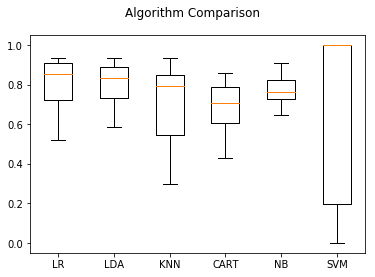

The best model for the given data is: <span style="color:green">LDA</span> with the score <span style="color:green">0.795920745920746</span>

{'name': 'LR', 'score': 0.7906093906093907}
{'name': 'LDA', 'score': 0.795920745920746}
{'name': 'KNN', 'score': 0.6999167499167499}
{'name': 'CART', 'score': 0.6797868797868798}
{'name': 'NB', 'score': 0.7781052281052281}
{'name': 'SVM', 'score': 0.6779220779220779}


**Training Section** for: 44 features

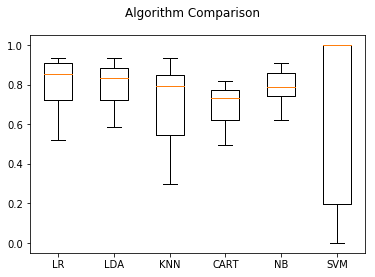

The best model for the given data is: <span style="color:green">LDA</span> with the score <span style="color:green">0.7946053946053946</span>

{'name': 'LR', 'score': 0.7906093906093907}
{'name': 'LDA', 'score': 0.7946053946053946}
{'name': 'KNN', 'score': 0.6999167499167499}
{'name': 'CART', 'score': 0.694055944055944}
{'name': 'NB', 'score': 0.7884448884448885}
{'name': 'SVM', 'score': 0.6779220779220779}


In [53]:
    best_tr_results = []
    for X_train_mod in new_trains:
        # train the new shape
        printmd("**Training Section** for: " + str(X_train_mod.shape[-1]) + " features")
        train_resultes = train_the_data(X_train_mod,Y_train,models)
        best_tr = get_the_best(train_resultes)
        best_tr_results.append({"name":best_tr['name'],"score":best_tr['score'],"num_fetures":int(X_train_mod.shape[-1])})
        for model in train_resultes:
            print (model)

{'name': 'LDA', 'score': 0.7660839160839161, 'num_fetures': 19}
{'name': 'LDA', 'score': 0.7660839160839161, 'num_fetures': 20}
{'name': 'LDA', 'score': 0.7841325341325341, 'num_fetures': 21}
{'name': 'LDA', 'score': 0.8034798534798535, 'num_fetures': 22}
{'name': 'LDA', 'score': 0.7983016983016984, 'num_fetures': 23}
{'name': 'LDA', 'score': 0.7957375957375958, 'num_fetures': 24}
{'name': 'LDA', 'score': 0.8035131535131536, 'num_fetures': 26}
{'name': 'LDA', 'score': 0.8022311022311023, 'num_fetures': 27}
{'name': 'LDA', 'score': 0.8022977022977023, 'num_fetures': 28}
{'name': 'LDA', 'score': 0.7932400932400931, 'num_fetures': 29}
{'name': 'LDA', 'score': 0.7958374958374959, 'num_fetures': 30}
{'name': 'LDA', 'score': 0.7971028971028971, 'num_fetures': 31}
{'name': 'LDA', 'score': 0.7984182484182484, 'num_fetures': 32}
{'name': 'LDA', 'score': 0.7984348984348985, 'num_fetures': 33}
{'name': 'LDA', 'score': 0.8022810522810522, 'num_fetures': 34}
{'name': 'LDA', 'score': 0.7971861471861

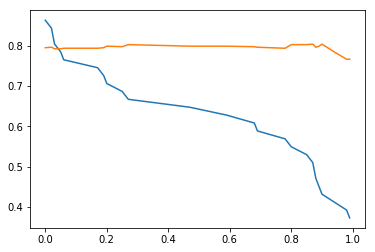

In [54]:
    for best in best_tr_results:
        print(best)
    plt.plot(new_range, np.column_stack((new_shapes_ratio, [rs['score'] for rs in best_tr_results])))

**Training Section** for: 418976 features

C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


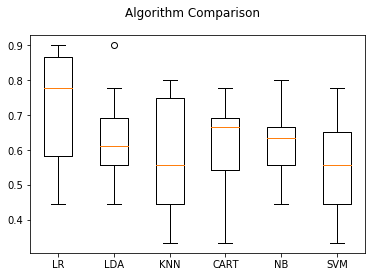

The best model for the given data is: <span style="color:green">LR</span> with the score <span style="color:green">0.7144444444444444</span>

{'name': 'LR', 'score': 0.7144444444444444}
{'name': 'LDA', 'score': 0.6266666666666667}
{'name': 'KNN', 'score': 0.5822222222222223}
{'name': 'CART', 'score': 0.62}
{'name': 'NB', 'score': 0.6177777777777778}
{'name': 'SVM', 'score': 0.5411111111111111}


**Training Section** for: 300021 features

C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


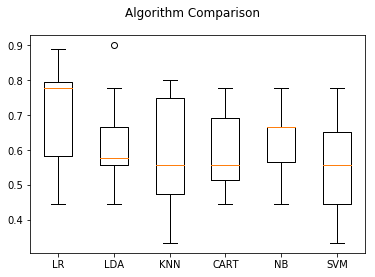

The best model for the given data is: <span style="color:green">LR</span> with the score <span style="color:green">0.6933333333333334</span>

{'name': 'LR', 'score': 0.6933333333333334}
{'name': 'LDA', 'score': 0.6166666666666666}
{'name': 'KNN', 'score': 0.5822222222222222}
{'name': 'CART', 'score': 0.5977777777777777}
{'name': 'NB', 'score': 0.6211111111111112}
{'name': 'SVM', 'score': 0.5411111111111111}


**Training Section** for: 249789 features

C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


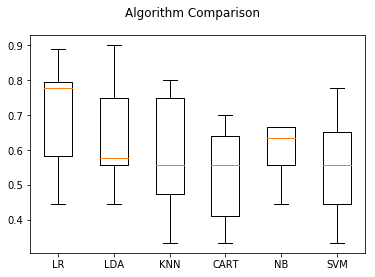

The best model for the given data is: <span style="color:green">LR</span> with the score <span style="color:green">0.6933333333333334</span>

{'name': 'LR', 'score': 0.6933333333333334}
{'name': 'LDA', 'score': 0.6277777777777778}
{'name': 'KNN', 'score': 0.5933333333333334}
{'name': 'CART', 'score': 0.5211111111111111}
{'name': 'NB', 'score': 0.598888888888889}
{'name': 'SVM', 'score': 0.5411111111111111}


**Training Section** for: 212518 features

C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


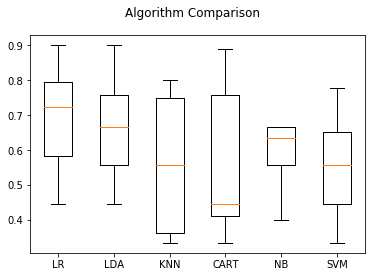

The best model for the given data is: <span style="color:green">LR</span> with the score <span style="color:green">0.6922222222222223</span>

{'name': 'LR', 'score': 0.6922222222222223}
{'name': 'LDA', 'score': 0.6488888888888888}
{'name': 'KNN', 'score': 0.56}
{'name': 'CART', 'score': 0.5544444444444444}
{'name': 'NB', 'score': 0.5888888888888889}
{'name': 'SVM', 'score': 0.5411111111111111}


**Training Section** for: 181350 features

C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


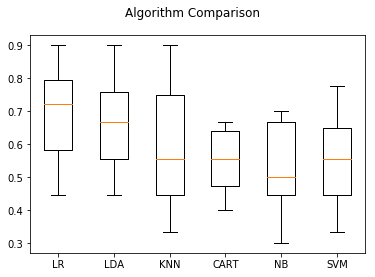

The best model for the given data is: <span style="color:green">LR</span> with the score <span style="color:green">0.7033333333333334</span>

{'name': 'LR', 'score': 0.7033333333333334}
{'name': 'LDA', 'score': 0.6488888888888888}
{'name': 'KNN', 'score': 0.5811111111111111}
{'name': 'CART', 'score': 0.5466666666666666}
{'name': 'NB', 'score': 0.5333333333333334}
{'name': 'SVM', 'score': 0.5411111111111111}


**Training Section** for: 153725 features

C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


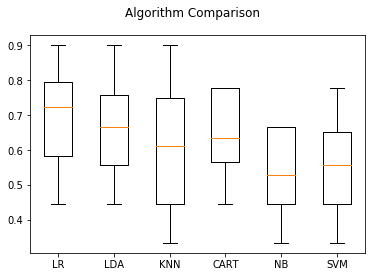

The best model for the given data is: <span style="color:green">LR</span> with the score <span style="color:green">0.7033333333333334</span>

{'name': 'LR', 'score': 0.7033333333333334}
{'name': 'LDA', 'score': 0.6599999999999999}
{'name': 'KNN', 'score': 0.5922222222222222}
{'name': 'CART', 'score': 0.6533333333333333}
{'name': 'NB', 'score': 0.5344444444444444}
{'name': 'SVM', 'score': 0.5411111111111111}


**Training Section** for: 129439 features

C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


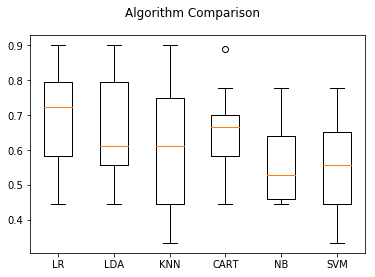

The best model for the given data is: <span style="color:green">LR</span> with the score <span style="color:green">0.7033333333333334</span>

{'name': 'LR', 'score': 0.7033333333333334}
{'name': 'LDA', 'score': 0.6588888888888889}
{'name': 'KNN', 'score': 0.5922222222222222}
{'name': 'CART', 'score': 0.6622222222222222}
{'name': 'NB', 'score': 0.5555555555555556}
{'name': 'SVM', 'score': 0.5411111111111111}


**Training Section** for: 108368 features

C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


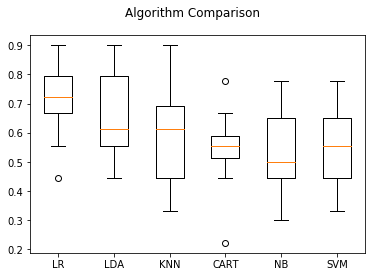

The best model for the given data is: <span style="color:green">LR</span> with the score <span style="color:green">0.7144444444444445</span>

{'name': 'LR', 'score': 0.7144444444444445}
{'name': 'LDA', 'score': 0.6588888888888889}
{'name': 'KNN', 'score': 0.5822222222222223}
{'name': 'CART', 'score': 0.5433333333333333}
{'name': 'NB', 'score': 0.5344444444444445}
{'name': 'SVM', 'score': 0.5411111111111111}


**Training Section** for: 90282 features

C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motybz\Anaconda3\envs\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [ ]:
#need to modify the test shape
    printmd("**Testing Section:**")
    test_results = test_the_data(X_train,Y_train,X_test,Y_test,models)
    best_ts = get_the_best(test_results)
    for model in test_results:
        print (model)


In [9]:
    # #after we found the elbow
    # new_shape = []
    # range = np.arange(0.04, 0.17, 0.001)
    # for VTHRESH in range:  
    #     sel = fs.VarianceThreshold(VTHRESH)
    #     x = sel.fit_transform(X_train)
    #     new_shape.append(x.shape[-1])
    # plt.plot(range, new_shape)